# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [ ]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [ ]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [ ]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [ ]:
df.BldgType.value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


### HouseStyle

In [ ]:
df.HouseStyle.value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


### Heating

In [ ]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


## Missing values

In [ ]:
df.isna().sum()

,0
MSSubClass,0
BldgType,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
Heating,0
CentralAir,0
GrLivArea,0
BedroomAbvGr,0


## Labels distribution

In [ ]:
df.Target.value_counts()

,count
Target,
0,1243
1,217


# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model
    * Set the parameter value range
        * You can use random values, interval of values, ...
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)

In [ ]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


In [ ]:
df.isna().sum()

,0
MSSubClass,0
BldgType,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
Heating,0
CentralAir,0
GrLivArea,0
BedroomAbvGr,0


In [ ]:
df.HouseStyle.value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


In [ ]:
housestyle_categories = ['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl','1.5Unf','2.5Unf','2.5Fin']

enc_cabin = OrdinalEncoder(categories=[housestyle_categories])
enc_cabin.fit_transform(df[['HouseStyle']])[:, 0][:10]


array([1., 0., 1., 1., 1., 2., 0., 1., 2., 5.])

In [ ]:
df.loc[:, 'HouseStyle'] = enc_cabin.fit_transform(df[['HouseStyle']])[:, 0]

In [ ]:
df.BldgType.value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


In [ ]:
bldgtype_categories = ['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon']

enc_cabin = OrdinalEncoder(categories=[bldgtype_categories])
enc_cabin.fit_transform(df[['BldgType']])[:, 0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 4.])

In [ ]:
df.loc[:, 'BldgType'] = enc_cabin.fit_transform(df[['BldgType']])[:, 0]

In [ ]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


In [ ]:
heating_categories = ['GasA', 'GasW', 'Grav', 'Wall', 'OthW','Floor']

enc_cabin = OrdinalEncoder(categories=[heating_categories])
enc_cabin.fit_transform(df[['Heating']])[:, 0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
df.loc[:, 'Heating'] = enc_cabin.fit_transform(df[['Heating']])[:, 0]

In [ ]:
df.CentralAir.value_counts()

,count
CentralAir,
Y,1365
N,95


In [ ]:
centralAir_categories = ['Y', 'N']

enc_cabin = OrdinalEncoder(categories=[centralAir_categories])
enc_cabin.fit_transform(df[['CentralAir']])[:, 0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
df.loc[:, 'CentralAir'] = enc_cabin.fit_transform(df[['CentralAir']])[:, 0]

In [ ]:
X, y = df.loc[:, df.columns != 'Target'], df.loc[:, 'Target']

In [ ]:
X.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,60,0.0,1.0,7,5,2003,0.0,0.0,1710,3
1,20,0.0,0.0,6,8,1976,0.0,0.0,1262,3
2,60,0.0,1.0,7,5,2001,0.0,0.0,1786,3
3,70,0.0,1.0,7,5,1915,0.0,0.0,1717,3
4,60,0.0,1.0,8,5,2000,0.0,0.0,2198,4


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df['Target'].value_counts()


,count
Target,
0,1243
1,217


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 10), (292, 10), (1168,), (292,))

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.9246575342465754

In [ ]:
skf=KFold(n_splits=5)
scores=list()
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    clf=DecisionTreeClassifier(random_state=13)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    scores.append(f1_score(y_test,y_pred))
scores

[0.651685393258427,
 0.7843137254901961,
 0.6818181818181818,
 0.676056338028169,
 0.6666666666666666]

In [ ]:
np.mean(scores)

0.692108061052328

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
scores_gb = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = GradientBoostingClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_gb.append(f1_score(y_test, y_pred))
scores_gb

[0.7142857142857143,
 0.8514851485148515,
 0.7674418604651163,
 0.7941176470588235,
 0.691358024691358]

In [ ]:
np.mean(scores_gb)

0.7637376790031727

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_scores_default = []
for x in np.arange(10, 150):
    skf = StratifiedKFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = GradientBoostingClassifier(n_estimators=x, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    gb_scores_default.append((x, np.mean(scores)))

gb_scores_default[:10]

[(10, 0.7408439913500154),
 (11, 0.744072061525454),
 (12, 0.744072061525454),
 (13, 0.7473001317008927),
 (14, 0.7504443558977484),
 (15, 0.7670164017380869),
 (16, 0.7718007475352645),
 (17, 0.7776981834327004),
 (18, 0.7805376896055398),
 (19, 0.7832915622389306)]

In [ ]:
df_res=pd.DataFrame.from_records(gb_scores_default,columns=['max_depth','f1'])
df_res.tail()

,max_depth,f1
135,145,0.746932
136,146,0.750467
137,147,0.753131
138,148,0.750467
139,149,0.750467


<Axes: xlabel='max_depth', ylabel='f1'>

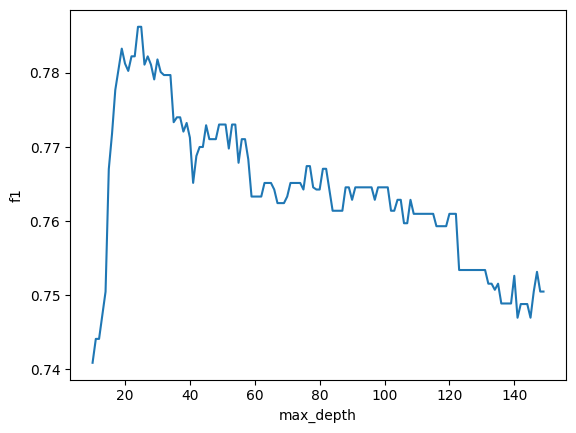

In [ ]:
sns.lineplot(data=df_res,x='max_depth',y='f1')

In [ ]:
df_res.sort_values(by='f1',ascending=False).head(5)

,max_depth,f1
15,25,0.786242
14,24,0.786242
9,19,0.783292
12,22,0.782249
13,23,0.782249


In [ ]:
skf = StratifiedKFold(n_splits=5)
gb_scores_default = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = GradientBoostingClassifier(max_depth = 25, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gb_scores_default.append(f1_score(y_test, y_pred))

gb_scores_default

[0.6813186813186813,
 0.7857142857142857,
 0.625,
 0.7272727272727273,
 0.6923076923076923]

In [ ]:
np.mean(gb_scores_default)

0.7023226773226774